# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [98]:
import csv

# The provided data as a multi-line string
data = """age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0
48.0,1.0,2.0,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,7.0,1
54.0,1.0,4.0,140.0,239.0,0.0,0.0,160.0,0.0,1.2,1.0,0.0,3.0,0
48.0,0.0,3.0,130.0,275.0,0.0,0.0,139.0,0.0,0.2,1.0,0.0,3.0,0
49.0,1.0,2.0,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,3.0,0
64.0,1.0,1.0,110.0,211.0,0.0,2.0,144.0,1.0,1.8,2.0,0.0,3.0,0
58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0.0,3.0,0
58.0,1.0,2.0,120.0,284.0,0.0,2.0,160.0,0.0,1.8,2.0,0.0,3.0,1
58.0,1.0,3.0,132.0,224.0,0.0,2.0,173.0,0.0,3.2,1.0,2.0,7.0,3
60.0,1.0,4.0,130.0,206.0,0.0,2.0,132.0,1.0,2.4,2.0,2.0,7.0,4
50.0,0.0,3.0,120.0,219.0,0.0,0.0,158.0,0.0,1.6,2.0,0.0,3.0,0
58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0
66.0,0.0,1.0,150.0,226.0,0.0,2.0,114.0,0.0,2.6,3.0,0.0,3.0,0
43.0,1.0,4.0,150.0,247.0,0.0,0.0,171.0,0.0,1.5,1.0,0.0,3.0,0
40.0,1.0,4.0,110.0,167.0,0.0,2.0,114.0,1.0,2.0,2.0,0.0,7.0,3
69.0,0.0,1.0,140.0,239.0,0.0,0.0,151.0,0.0,1.8,1.0,2.0,3.0,0
60.0,1.0,4.0,117.0,230.0,1.0,0.0,160.0,1.0,1.4,1.0,2.0,7.0,2
64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1
59.0,1.0,4.0,135.0,234.0,0.0,0.0,161.0,0.0,0.5,2.0,0.0,7.0,0
44.0,1.0,3.0,130.0,233.0,0.0,0.0,179.0,1.0,0.4,2.0,0.0,3.0,0
42.0,1.0,4.0,140.0,226.0,0.0,0.0,178.0,0.0,0.0,1.0,0.0,3.0,0
61.0,1.0,1.0,134.0,234.0,0.0,0.0,145.0,0.0,2.6,2.0,2.0,3.0,1
71.0,0.0,3.0,110.0,265.0,1.0,2.0,130.0,0.0,0.0,1.0,1.0,3.0,0
54.0,1.0,4.0,108.0,309.0,0.0,2.0,156.0,0.0,0.0,1.0,0.0,3.0,1
51.0,1.0,3.0,140.0,308.0,0.0,2.0,142.0,0.0,1.5,1.0,1.0,3.0,0
58.0,1.0,3.0,125.0,300.0,0.0,2.0,171.0,0.0,0.0,1.0,2.0,3.0,3
41.0,1.0,4.0,110.0,235.0,0.0,0.0,153.0,0.0,0.0,1.0,0.0,3.0,0
43.0,0.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0,0

"""

# Split the data into lines
lines = data.strip().split('\n')

# Specify the CSV file name
csv_filename = "heart_data.csv"

# Open the CSV file for writing
with open(csv_filename, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Iterate through the lines and write them as rows in the CSV file
    for line in lines:
        row = line.split(',')
        csv_writer.writerow(row)

print(f"CSV file '{csv_filename}' has been created.")

CSV file 'heart_data.csv' has been created.


In [99]:
# Ruta al archivo CSV en Google Drive
archivo_csv = '/content/heart_data.csv'

# Leer el archivo CSV en un DataFrame de pandas
my_data = pd.read_csv(archivo_csv)

In [100]:
my_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [101]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000
mean,54.860465,0.72093,2.930233,131.348837,250.418605,0.162791,0.930233,155.465116,0.232558,1.306977,1.604651,0.55814,4.232558,0.720930
std,8.716655,0.45385,1.055492,14.420362,43.650251,0.373544,1.009369,18.203020,0.427463,1.043436,0.728323,0.88108,1.810514,1.119642
min,37.000000,0.00000,1.000000,108.000000,167.000000,0.000000,0.000000,108.000000,0.000000,0.000000,1.000000,0.00000,3.000000,0.000000
25%,48.500000,0.00000,2.000000,120.000000,226.000000,0.000000,0.000000,146.000000,0.000000,0.450000,1.000000,0.00000,3.000000,0.000000
50%,57.000000,1.00000,3.000000,130.000000,239.000000,0.000000,0.000000,160.000000,0.000000,1.400000,1.000000,0.00000,3.000000,0.000000
75%,60.500000,1.00000,4.000000,140.000000,279.000000,0.000000,2.000000,171.000000,0.000000,1.850000,2.000000,1.00000,6.500000,1.000000
max,71.000000,1.00000,4.000000,172.000000,354.000000,1.000000,2.000000,187.000000,1.000000,3.600000,3.000000,3.00000,7.000000,4.000000


In [102]:
import pandas as pd

# Cargar el conjunto de datos desde el archivo CSV
# Definir las columnas numéricas
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]

# Definir las columnas categóricas
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Definir la columna objetivo
target = "num"

# Ahora puedes acceder a las columnas según estas listas
df_numerical = my_data[numerical_features]
df_categorical = my_data[categorical_features]
df_target = my_data[target]


Una vez separadas las variables por tipo, podemos empezar el analisis. Lo primero es binarizar a la variable target

In [103]:
my_data[target].value_counts()

0    27
1     7
2     4
3     4
4     1
Name: num, dtype: int64

In [104]:
import pandas as pd

# Cargar el conjunto de datos desde un archivo CSV
df = pd.read_csv('/content/heart_data.csv')

# Visualizar las primeras filas del DataFrame para entender los datos
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [105]:
# Obtener un resumen estadístico básico de las columnas numéricas
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000
mean,54.860465,0.72093,2.930233,131.348837,250.418605,0.162791,0.930233,155.465116,0.232558,1.306977,1.604651,0.55814,4.232558,0.720930
std,8.716655,0.45385,1.055492,14.420362,43.650251,0.373544,1.009369,18.203020,0.427463,1.043436,0.728323,0.88108,1.810514,1.119642
min,37.000000,0.00000,1.000000,108.000000,167.000000,0.000000,0.000000,108.000000,0.000000,0.000000,1.000000,0.00000,3.000000,0.000000
25%,48.500000,0.00000,2.000000,120.000000,226.000000,0.000000,0.000000,146.000000,0.000000,0.450000,1.000000,0.00000,3.000000,0.000000
50%,57.000000,1.00000,3.000000,130.000000,239.000000,0.000000,0.000000,160.000000,0.000000,1.400000,1.000000,0.00000,3.000000,0.000000
75%,60.500000,1.00000,4.000000,140.000000,279.000000,0.000000,2.000000,171.000000,0.000000,1.850000,2.000000,1.00000,6.500000,1.000000
max,71.000000,1.00000,4.000000,172.000000,354.000000,1.000000,2.000000,187.000000,1.000000,3.600000,3.000000,3.00000,7.000000,4.000000


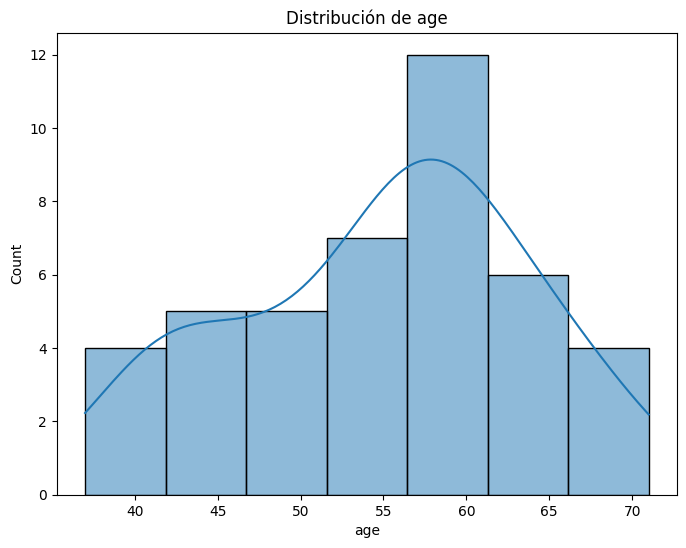

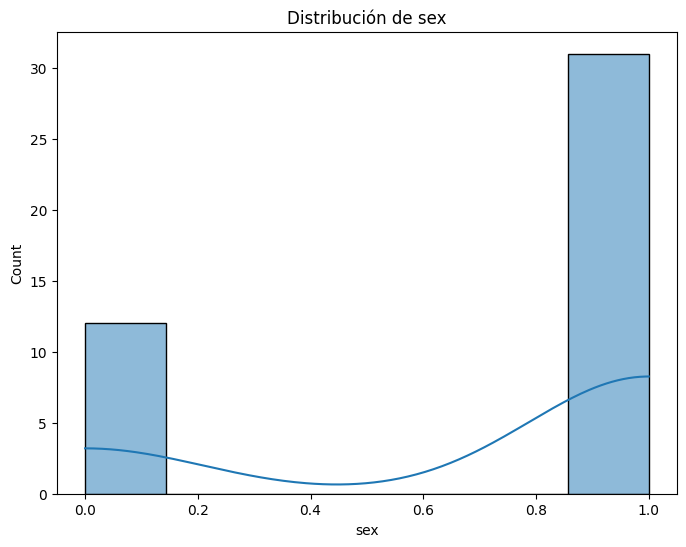

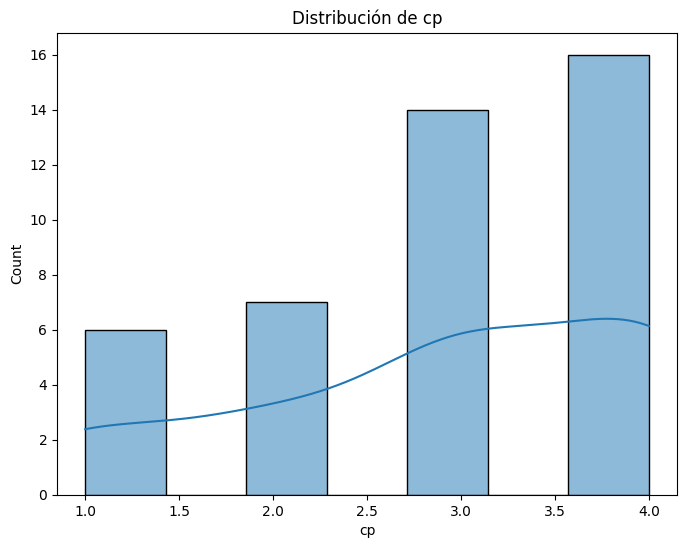

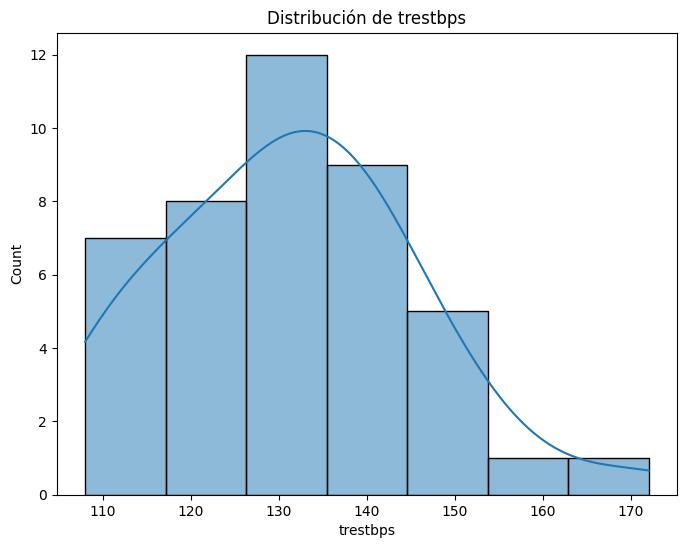

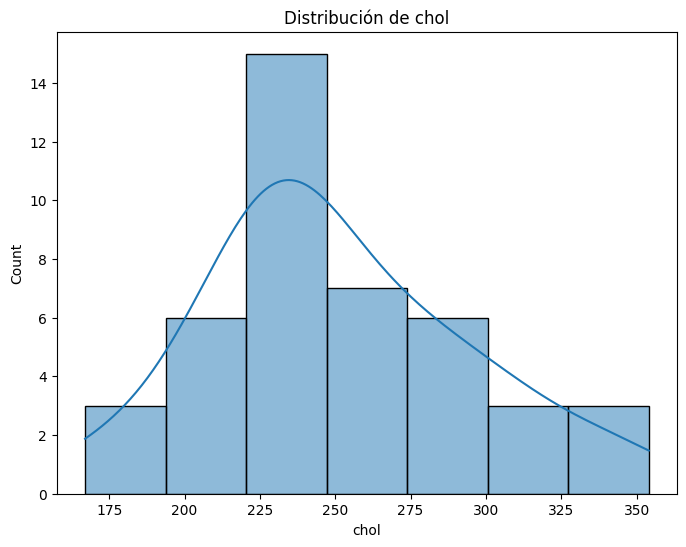

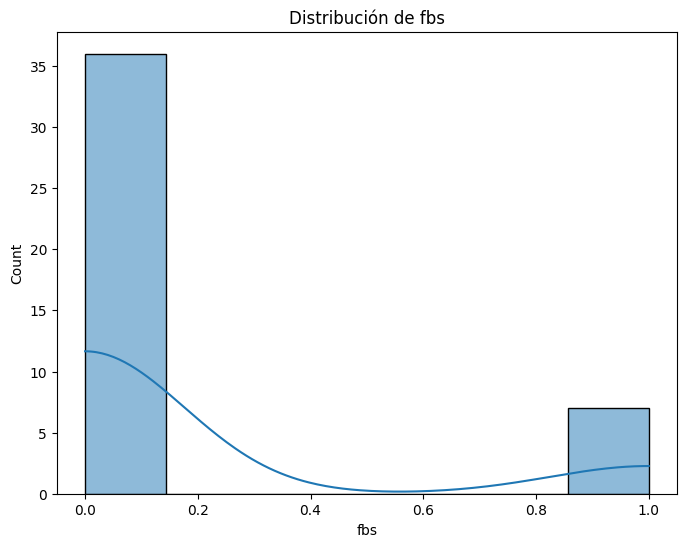

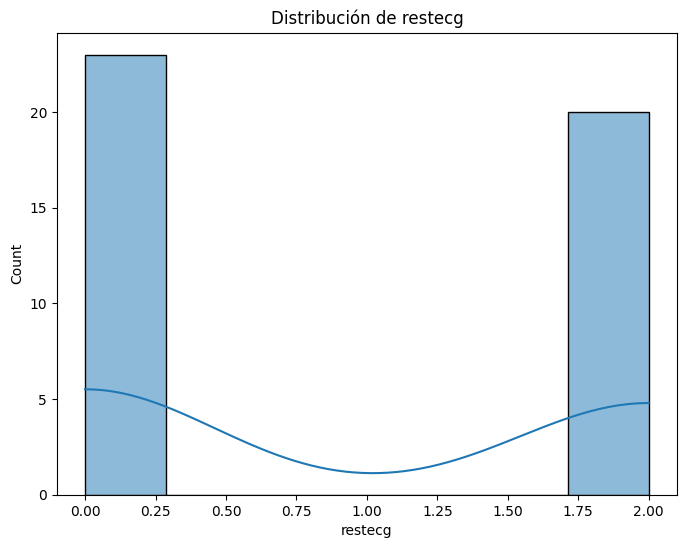

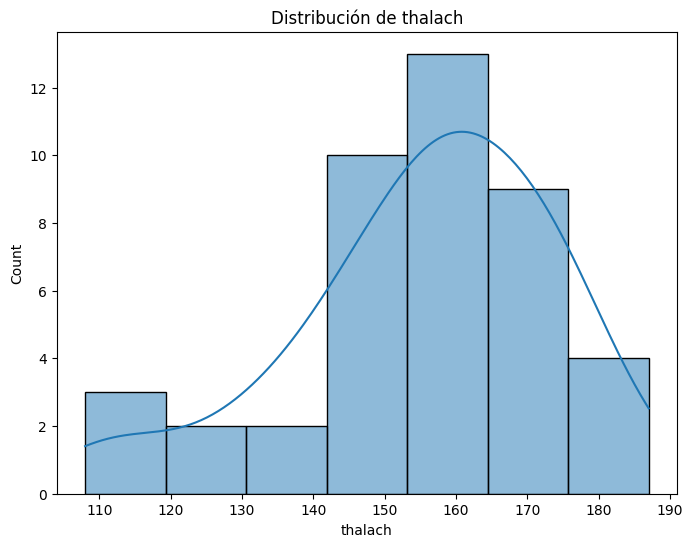

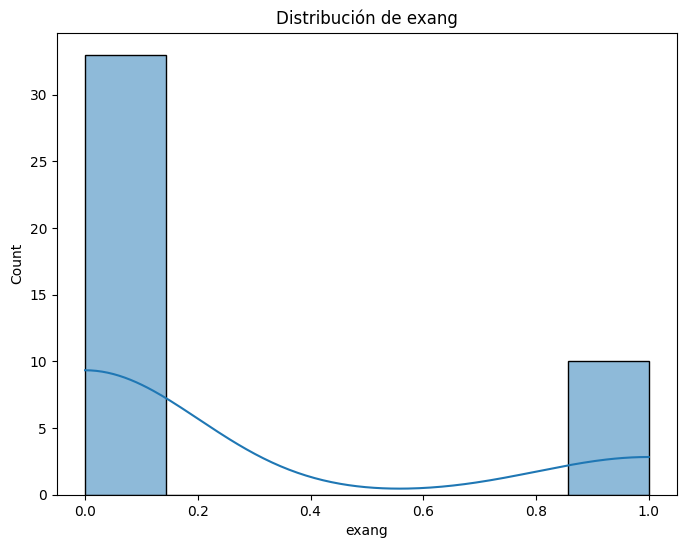

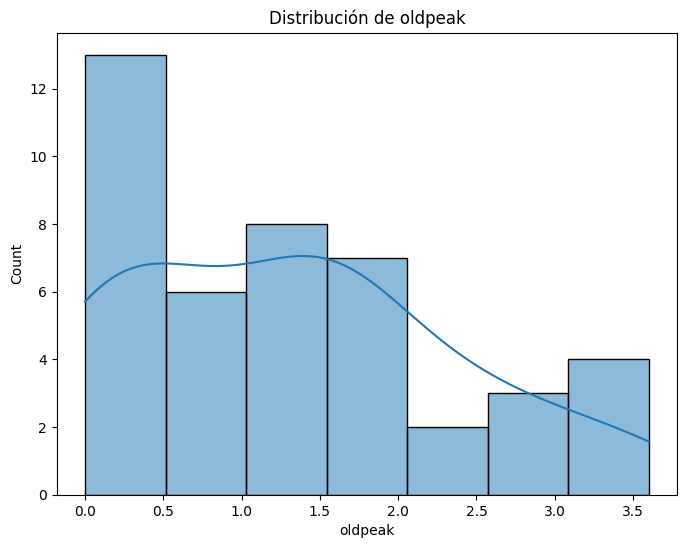

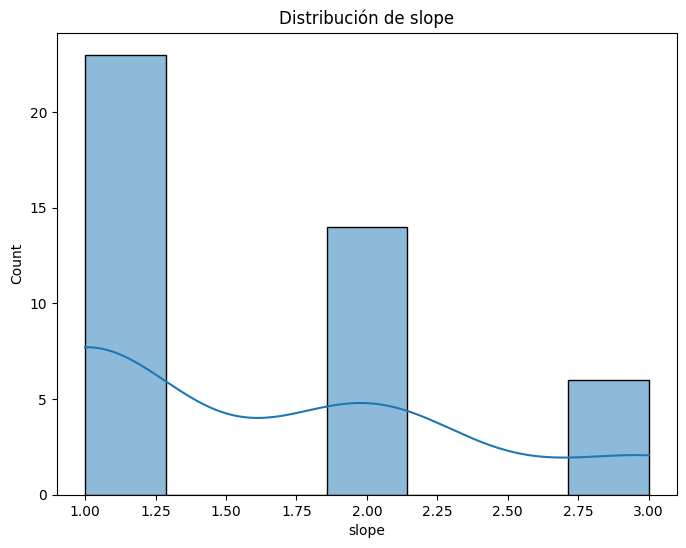

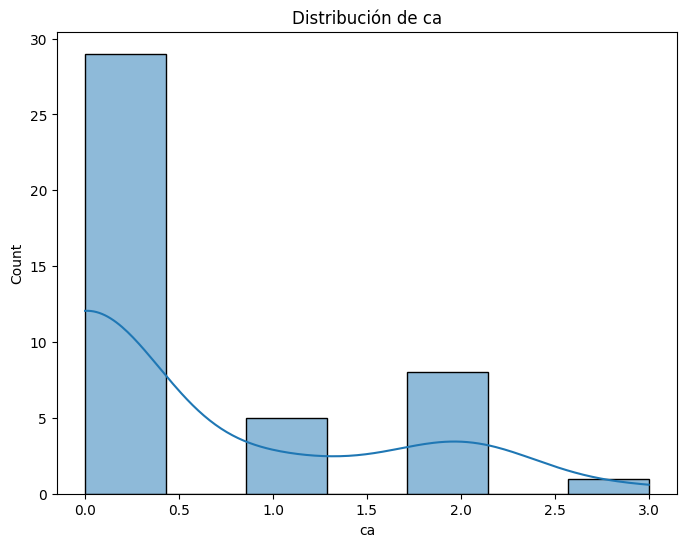

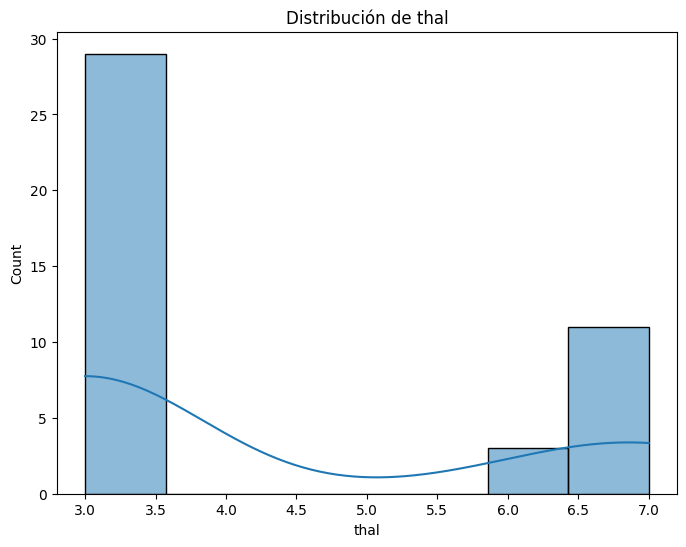

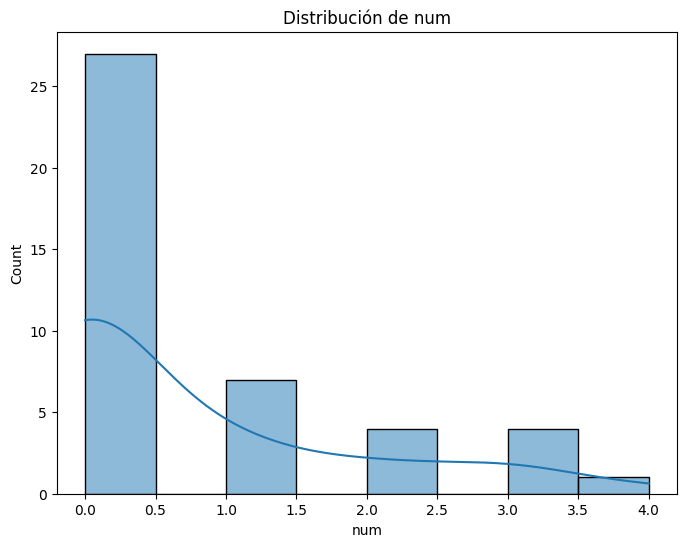

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas de las variables numéricas
for columna in df.columns:
    if df[columna].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f'Distribución de {columna}')
        plt.show()


In [107]:
df = df[df["num"] != 4]
df["num"].value_counts()


0    27
1     7
2     4
3     4
Name: num, dtype: int64

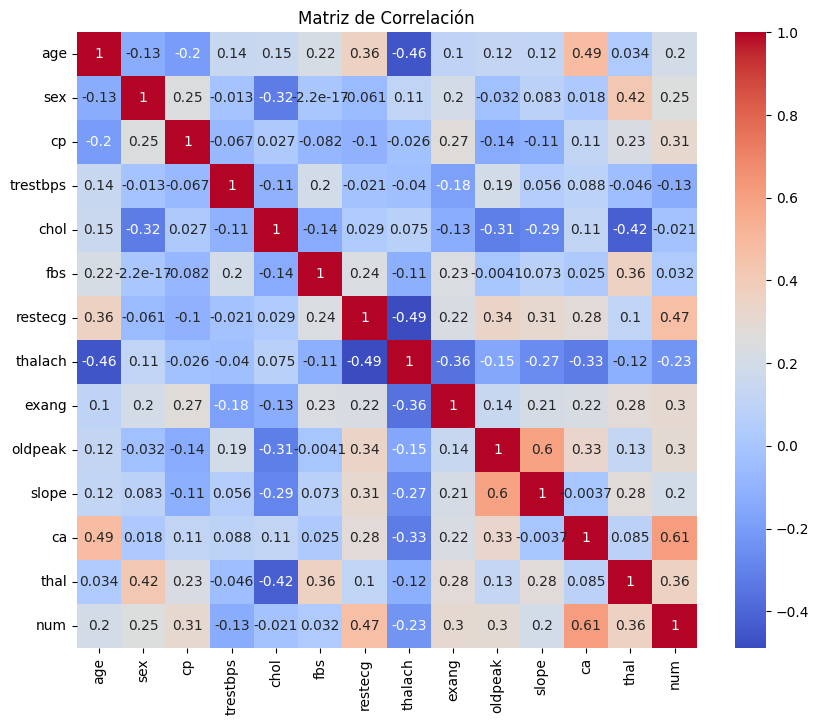

In [108]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


In [109]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(df.drop(target, axis=1), df[target], test_size=0.3, random_state=42)

# Imprime las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Dimensiones del conjunto de entrenamiento: X_train.shape={X_train.shape}, y_train.shape={y_train.shape}')
print(f'Dimensiones del conjunto de prueba: X_test.shape={X_test.shape}, y_test.shape={y_test.shape}')


Dimensiones del conjunto de entrenamiento: X_train.shape=(29, 13), y_train.shape=(29,)
Dimensiones del conjunto de prueba: X_test.shape=(13, 13), y_test.shape=(13,)


0    27
1     7
2     4
3     4
4     1
Name: num, dtype: int64


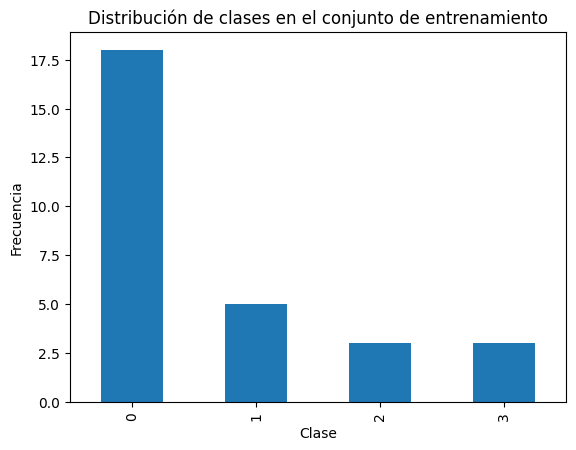

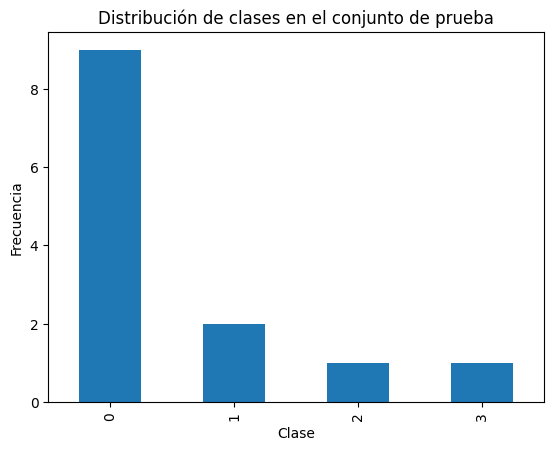

In [110]:



# Comprobar la distribución de clases
class_counts = Y.value_counts()
print(class_counts)

# Filtrar clases con menos de 2 miembros
classes_to_keep = class_counts[class_counts >= 2].index
df_filtered = df[df['num'].isin(classes_to_keep)]

# Definir las variables predictoras (X) y la variable objetivo (Y) nuevamente
X_filtered = df_filtered.drop("num", axis=1)
Y_filtered = df_filtered['num']

# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.3, stratify=Y_filtered, random_state=2)

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba




# Visualizar la distribución de clases en el conjunto de entrenamiento
Y_train.value_counts().plot(kind='bar')
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de clases en el conjunto de prueba
Y_test.value_counts().plot(kind='bar')
plt.title('Distribución de clases en el conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()




In [111]:
Y = df['num']  # Variable objetivo
Y

0     0
1     2
2     1
3     0
4     0
5     0
6     3
7     0
8     2
9     1
10    0
11    0
12    2
13    0
14    0
15    0
16    1
17    0
18    0
19    0
20    0
21    0
22    1
23    3
25    0
26    0
27    0
28    0
29    3
30    0
31    2
32    1
33    0
34    0
35    0
36    1
37    0
38    1
39    0
40    3
41    0
42    0
Name: num, dtype: int64

In [112]:

# Balancear las clases hasta el 50% de la clase mayoritaria
minorias_class_max = int(df["num"].value_counts().max() * 0.5)
cuenta_clases_min = df["num"].value_counts().min()
if cuenta_clases_min > minorias_class_max:
    # Realizar muestreo aleatorio para reducir la cantidad de registros
    minclas_Index = np.where(df['num'] == df["num"].value_counts().idxmin())[0]
    randoom_minoria_clases = np.random.choice(minclas_Index, size=int(minorias_class_max), replace=False)
    df_H501_balanced2 = pd.concat([df[df['num']!=df["num"].value_counts().idxmin()],
                                   df.iloc[randoom_minoria_clases]], axis=0)
else:
    df = df.copy()

In [113]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [114]:
from imblearn.over_sampling import SMOTE


In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['num'] = le.fit_transform(df['num'])


In [116]:
from imblearn.over_sampling import SMOTE

def balance_classes(data, target_column):
    """
    Balancea las clases 2, 3 y 4 al 50% de los datos de la clase 1 utilizando SMOTE.

    Parámetros:
    - data: DataFrame con los datos.
    - target_column: Nombre de la columna objetivo.

    Retorna:
    - DataFrame balanceado.
    """
    # Determinar el número de muestras de la clase 0
    num_samples_class_1 = len(data[data[target_column] == 0])

    # Establecer el número objetivo de muestras para las clases 2, 3 y 4
    target_samples = int(0.5 * num_samples_class_1)

    # Asegurarse de que el número objetivo de muestras sea mayor o igual al número original de muestras
    min_samples = float('inf')
    for class_label in [1, 2, 3]:
        original_samples = len(data[data[target_column] == class_label])
        if target_samples < original_samples:
            target_samples = original_samples
        min_samples = min(min_samples, original_samples)

    # Definir la estrategia de sobremuestreo
    sampling_strategy = {1: target_samples, 2: target_samples, 3: target_samples, 3: target_samples}

    # Inicializar SMOTE con k_neighbors ajustado dinámicamente
    smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42, k_neighbors=min(min_samples-1, 4))

    # Separar las variables predictoras y la variable objetivo
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Aplicar SMOTE
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combinar las variables predictoras y la variable objetivo en un DataFrame
    balanced_data = pd.concat([X_resampled, y_resampled], axis=1)

    return balanced_data



In [117]:
df_balanced = balance_classes(df, "num")


In [118]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [119]:
df_balanced

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000000,1.000000,1.000000,145.000000,233.000000,1.0,2.0,150.000000,0.000000,2.300000,3.000000,0.000000,6.000000,0
1,67.000000,1.000000,4.000000,160.000000,286.000000,0.0,2.0,108.000000,1.000000,1.500000,2.000000,3.000000,3.000000,2
2,67.000000,1.000000,4.000000,120.000000,229.000000,0.0,2.0,129.000000,1.000000,2.600000,2.000000,2.000000,7.000000,1
3,37.000000,1.000000,3.000000,130.000000,250.000000,0.0,0.0,187.000000,0.000000,3.500000,3.000000,0.000000,3.000000,0
4,41.000000,0.000000,2.000000,130.000000,204.000000,0.0,2.0,172.000000,0.000000,1.400000,1.000000,0.000000,3.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,58.000000,1.000000,3.000000,131.855909,225.564422,0.0,2.0,172.958831,0.000000,3.134130,1.000000,2.000000,6.917662,3
62,57.458377,1.000000,3.030090,131.338017,222.284862,0.0,2.0,171.224681,0.030090,3.163892,1.030090,1.939820,7.000000,3
63,61.329771,0.167557,3.832443,137.486640,273.361835,0.0,2.0,161.843131,0.000000,2.996794,2.664885,2.000000,3.000000,3
64,57.328540,0.212339,4.000000,133.629827,246.553750,0.0,2.0,150.232401,0.212339,3.260257,2.787661,1.575322,3.849356,3


In [120]:
#df = pd.read_csv('/content/heart_data.csv')


# Comprobar la distribución de clases
class_counts = df_balanced['num'].value_counts()
print(class_counts)

# Filtrar clases con menos de 2 miembros
classes_to_keep = class_counts[class_counts > 0].index
df_filtered = df_balanced[df_balanced['num'].isin(classes_to_keep)]

# Definir las variables predictoras (X) y la variable objetivo (Y) nuevamente
X_filtered = df_filtered.drop("num", axis=1)
Y_filtered = df_filtered['num']


0    27
2    13
1    13
3    13
Name: num, dtype: int64


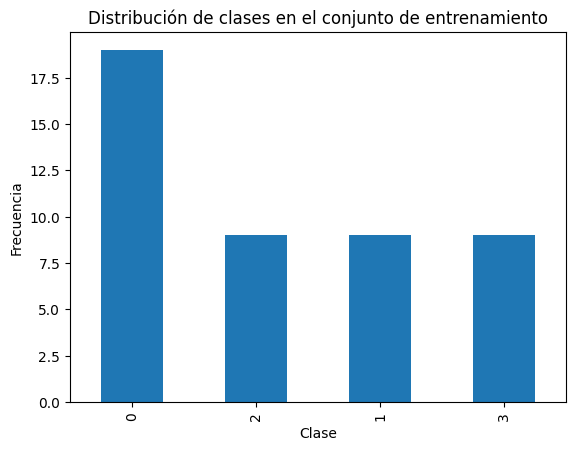

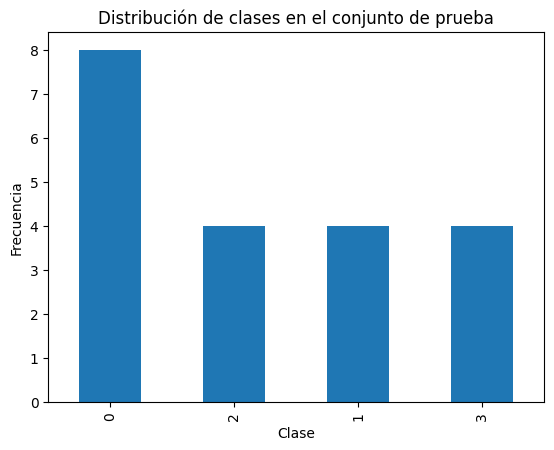

In [121]:

# Dividir los datos en conjunto de entrenamiento (70%) y conjunto de prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X_filtered, Y_filtered, test_size=0.3, stratify=Y_filtered, random_state=2)

# Visualizar la distribución de clases en el conjunto de entrenamiento y prueba




# Visualizar la distribución de clases en el conjunto de entrenamiento
Y_train.value_counts().plot(kind='bar')
plt.title('Distribución de clases en el conjunto de entrenamiento')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de clases en el conjunto de prueba
Y_test.value_counts().plot(kind='bar')
plt.title('Distribución de clases en el conjunto de prueba')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

In [123]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados.

In [125]:
# Crear y entrenar los modelos
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(Y_test, Y_pred))
    print("------------------------------------------------------")

Model: Logistic Regression
Accuracy: 0.9
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         4
           3       0.80      1.00      0.89         4

    accuracy                           0.90        20
   macro avg       0.89      0.91      0.89        20
weighted avg       0.91      0.90      0.90        20

------------------------------------------------------
Model: SVM
Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4

    accuracy                           0.40        20
   macro avg       0.10      0.25      0.14        20
weighted avg       0.16      0.40      0.23        20

---------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Interpretación de Resultados:**

Regresión Logística y Random Forest tienen la mayor precisión con un 90%. Estos modelos parecen ser los más adecuados para este conjunto de datos.
SVM y KNN tienen una precisión del 40%, lo que indica que estos modelos no son adecuados para este conjunto de datos en particular.
Árbol de Decisión tiene una precisión del 70%, lo que es aceptable pero no óptimo.
Es importante notar que algunos modelos tienen advertencias sobre etiquetas con muestras no predichas. Esto puede indicar que el modelo no es capaz de reconocer ciertas clases en el conjunto de datos, lo que puede ser problemático en aplicaciones del mundo real.